In [1]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
pip install 'lightgbm[pandas]'

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'lightgbm[pandas]'"


In [3]:
df = pd.read_csv("C:/Users/SAURABH/Downloads/Complete-data.csv")

In [4]:
df.drop(columns=['Landslide'])


Aspect  Curvature  Earthquake  Elevation  Flow  Lithology  NDVI  NDWI  \
0          3          3           2          2     2          1     4     2   
1          1          5           2          3     1          1     4     2   
2          3          4           3          2     2          4     3     2   
3          1          3           3          3     5          1     2     4   
4          5          4           2          1     4          1     2     4   
...      ...        ...         ...        ...   ...        ...   ...   ...   
1207       4          2           1          4     2          5     1     5   
1208       4          5           1          5     3          5     1     5   
1209       3          4           1          5     2          5     2     3   
1210       2          2           1          3     1          1     5     1   
1211       3          4           1          3     2          1     4     1   

      Plan  Precipitation  Profile  Slope  
0        2              3        3      2  
1        5              5        2      2  
2        4              5        2      2  
3        3              5        3      3  
4        3              3        1      4  
...    ...            ...      ...    ...  
1207     3              2        4      2  
1208     5              2        1      5  
1209     3              2        2      5  
1210     1              1        3      3  
1211     4              1        2      3  

[1212 rows x 12 columns]

# **EDA**

In [5]:
df.head()

Landslide  Aspect  Curvature  Earthquake  Elevation  Flow  Lithology  NDVI  \
0          0       3          3           2          2     2          1     4   
1          0       1          5           2          3     1          1     4   
2          0       3          4           3          2     2          4     3   
3          0       1          3           3          3     5          1     2   
4          0       5          4           2          1     4          1     2   

   NDWI  Plan  Precipitation  Profile  Slope  
0     2     2              3        3      2  
1     2     5              5        2      2  
2     2     4              5        2      2  
3     4     3              5        3      3  
4     4     3              3        1      4

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [7]:
df.describe()

Landslide       Aspect    Curvature   Earthquake    Elevation  \
count  1212.000000  1212.000000  1212.000000  1212.000000  1212.000000   
mean      0.500000     2.962046     2.977723     2.102310     2.436469   
std       0.500206     1.147378     1.099658     0.669812     1.242686   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     2.000000     2.000000     2.000000     1.000000   
50%       0.500000     3.000000     3.000000     2.000000     2.000000   
75%       1.000000     4.000000     4.000000     3.000000     3.000000   
max       1.000000     5.000000     5.000000     3.000000     5.000000   

              Flow    Lithology         NDVI         NDWI         Plan  \
count  1212.000000  1212.000000  1212.000000  1212.000000  1212.000000   
mean      2.338284     1.948845     3.042904     2.773927     3.059406   
std       1.112686     1.424345     1.239246     1.299830     1.057287   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     1.000000     2.000000     2.000000     2.000000   
50%       2.000000     1.000000     3.000000     3.000000     3.000000   
75%       3.000000     3.000000     4.000000     4.000000     4.000000   
max       5.000000     6.000000     5.000000     5.000000     5.000000   

       Precipitation      Profile        Slope  
count    1212.000000  1212.000000  1212.000000  
mean        3.813531     3.262376     2.811881  
std         1.347799     1.039502     1.194229  
min         1.000000     1.000000     1.000000  
25%         3.000000     3.000000     2.000000  
50%         4.000000     3.000000     3.000000  
75%         5.000000     4.000000     4.000000  
max         5.000000     5.000000     5.000000

In [8]:
temp_cols=df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df=df[new_cols]

In [9]:
df.describe().round(2)

Aspect  Curvature  Earthquake  Elevation     Flow  Lithology     NDVI  \
count  1212.00    1212.00     1212.00    1212.00  1212.00    1212.00  1212.00   
mean      2.96       2.98        2.10       2.44     2.34       1.95     3.04   
std       1.15       1.10        0.67       1.24     1.11       1.42     1.24   
min       1.00       1.00        1.00       1.00     1.00       1.00     1.00   
25%       2.00       2.00        2.00       1.00     2.00       1.00     2.00   
50%       3.00       3.00        2.00       2.00     2.00       1.00     3.00   
75%       4.00       4.00        3.00       3.00     3.00       3.00     4.00   
max       5.00       5.00        3.00       5.00     5.00       6.00     5.00   

          NDWI     Plan  Precipitation  Profile    Slope  Landslide  
count  1212.00  1212.00        1212.00  1212.00  1212.00     1212.0  
mean      2.77     3.06           3.81     3.26     2.81        0.5  
std       1.30     1.06           1.35     1.04     1.19        0.5  
min       1.00     1.00           1.00     1.00     1.00        0.0  
25%       2.00     2.00           3.00     3.00     2.00        0.0  
50%       3.00     3.00           4.00     3.00     3.00        0.5  
75%       4.00     4.00           5.00     4.00     4.00        1.0  
max       5.00     5.00           5.00     5.00     5.00        1.0

In [10]:
for column in df.columns[0:]:
    print(column, ': ', len(df[column].unique()), ' labels')

Aspect :  5  labels
Curvature :  5  labels
Earthquake :  3  labels
Elevation :  5  labels
Flow :  5  labels
Lithology :  6  labels
NDVI :  5  labels
NDWI :  5  labels
Plan :  5  labels
Precipitation :  5  labels
Profile :  5  labels
Slope :  5  labels
Landslide :  2  labels


Text(0.5, 0, 'Landslide')

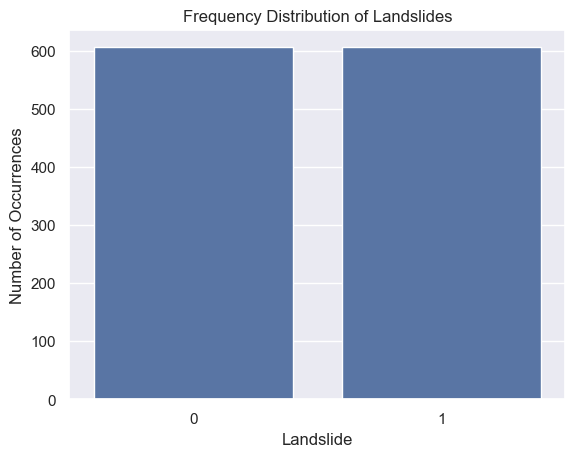

In [11]:
landslide_count = df['Landslide'].value_counts()
sns.set(style="darkgrid")
sns.countplot(x = 'Landslide', data = df)
plt.title('Frequency Distribution of Landslides')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Landslide', fontsize=12)


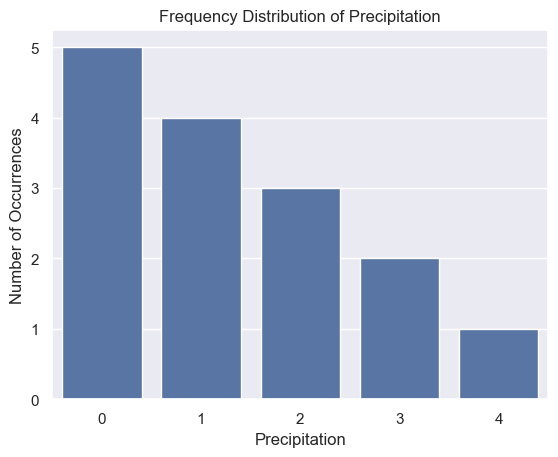

<Figure size 640x480 with 0 Axes>

In [12]:
perc_count = df['Precipitation'].value_counts()
sns.set(style="darkgrid")
sns.barplot(perc_count.index)
plt.title('Frequency Distribution of Precipitation')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Precipitation', fontsize=12)
plt.show()

plt.savefig('bar2.eps', format='eps')

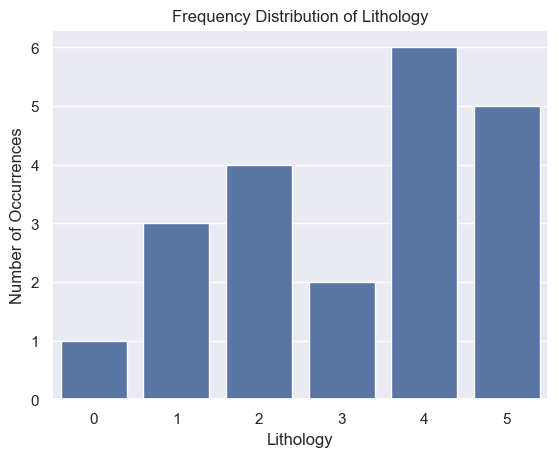

<Figure size 640x480 with 0 Axes>

In [13]:
lith_count = df['Lithology'].value_counts()
sns.set(style="darkgrid")
sns.barplot(lith_count.index)
plt.title('Frequency Distribution of Lithology')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Lithology', fontsize=12)
plt.show()

plt.savefig('bar3.eps', format='eps')

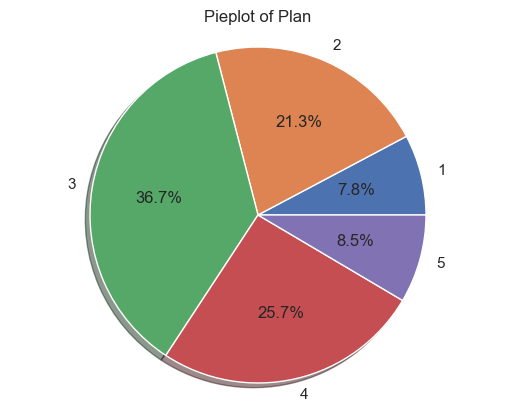

<Figure size 640x480 with 0 Axes>

In [14]:
labels = df['Plan'].astype('category').cat.categories.tolist()
counts = df['Plan'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Plan')
plt.show()

plt.savefig('pie1.eps', format='eps')

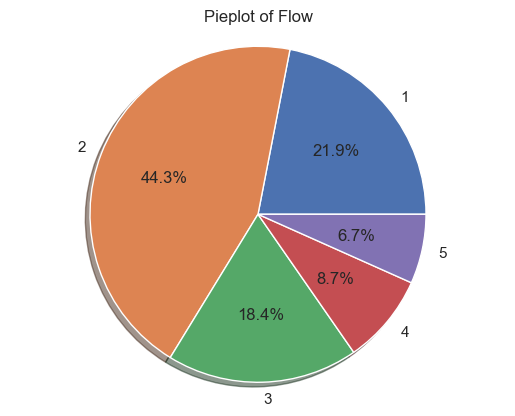

<Figure size 640x480 with 0 Axes>

In [15]:
labels = df['Flow'].astype('category').cat.categories.tolist()
counts = df['Flow'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Flow')
plt.show()

plt.savefig('pie2.eps', format='eps')

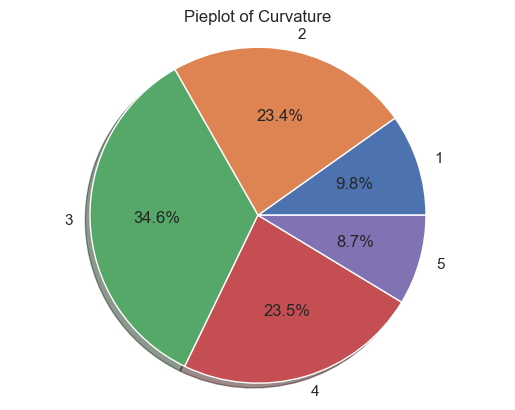

<Figure size 640x480 with 0 Axes>

In [16]:
labels = df['Curvature'].astype('category').cat.categories.tolist()
counts = df['Curvature'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is used to show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Curvature')
plt.show()

plt.savefig('pie3.eps', format='eps')

c:\Users\SAURABH\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\SAURABH\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


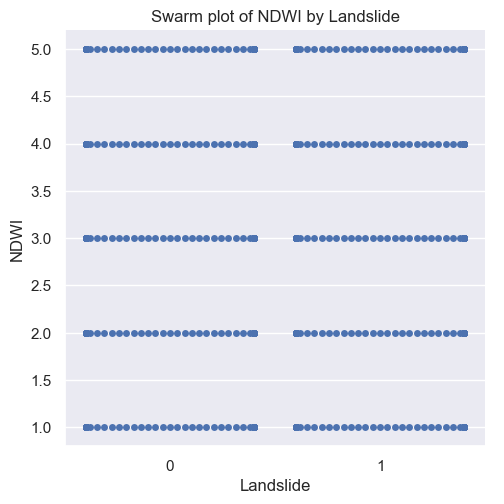

In [17]:
sns.catplot(x="Landslide", y="NDWI", kind="swarm", data=df)
plt.xlabel('Landslide')
plt.ylabel('NDWI')
plt.title('Swarm plot of NDWI by Landslide')
plt.savefig('box1.eps', format='eps')

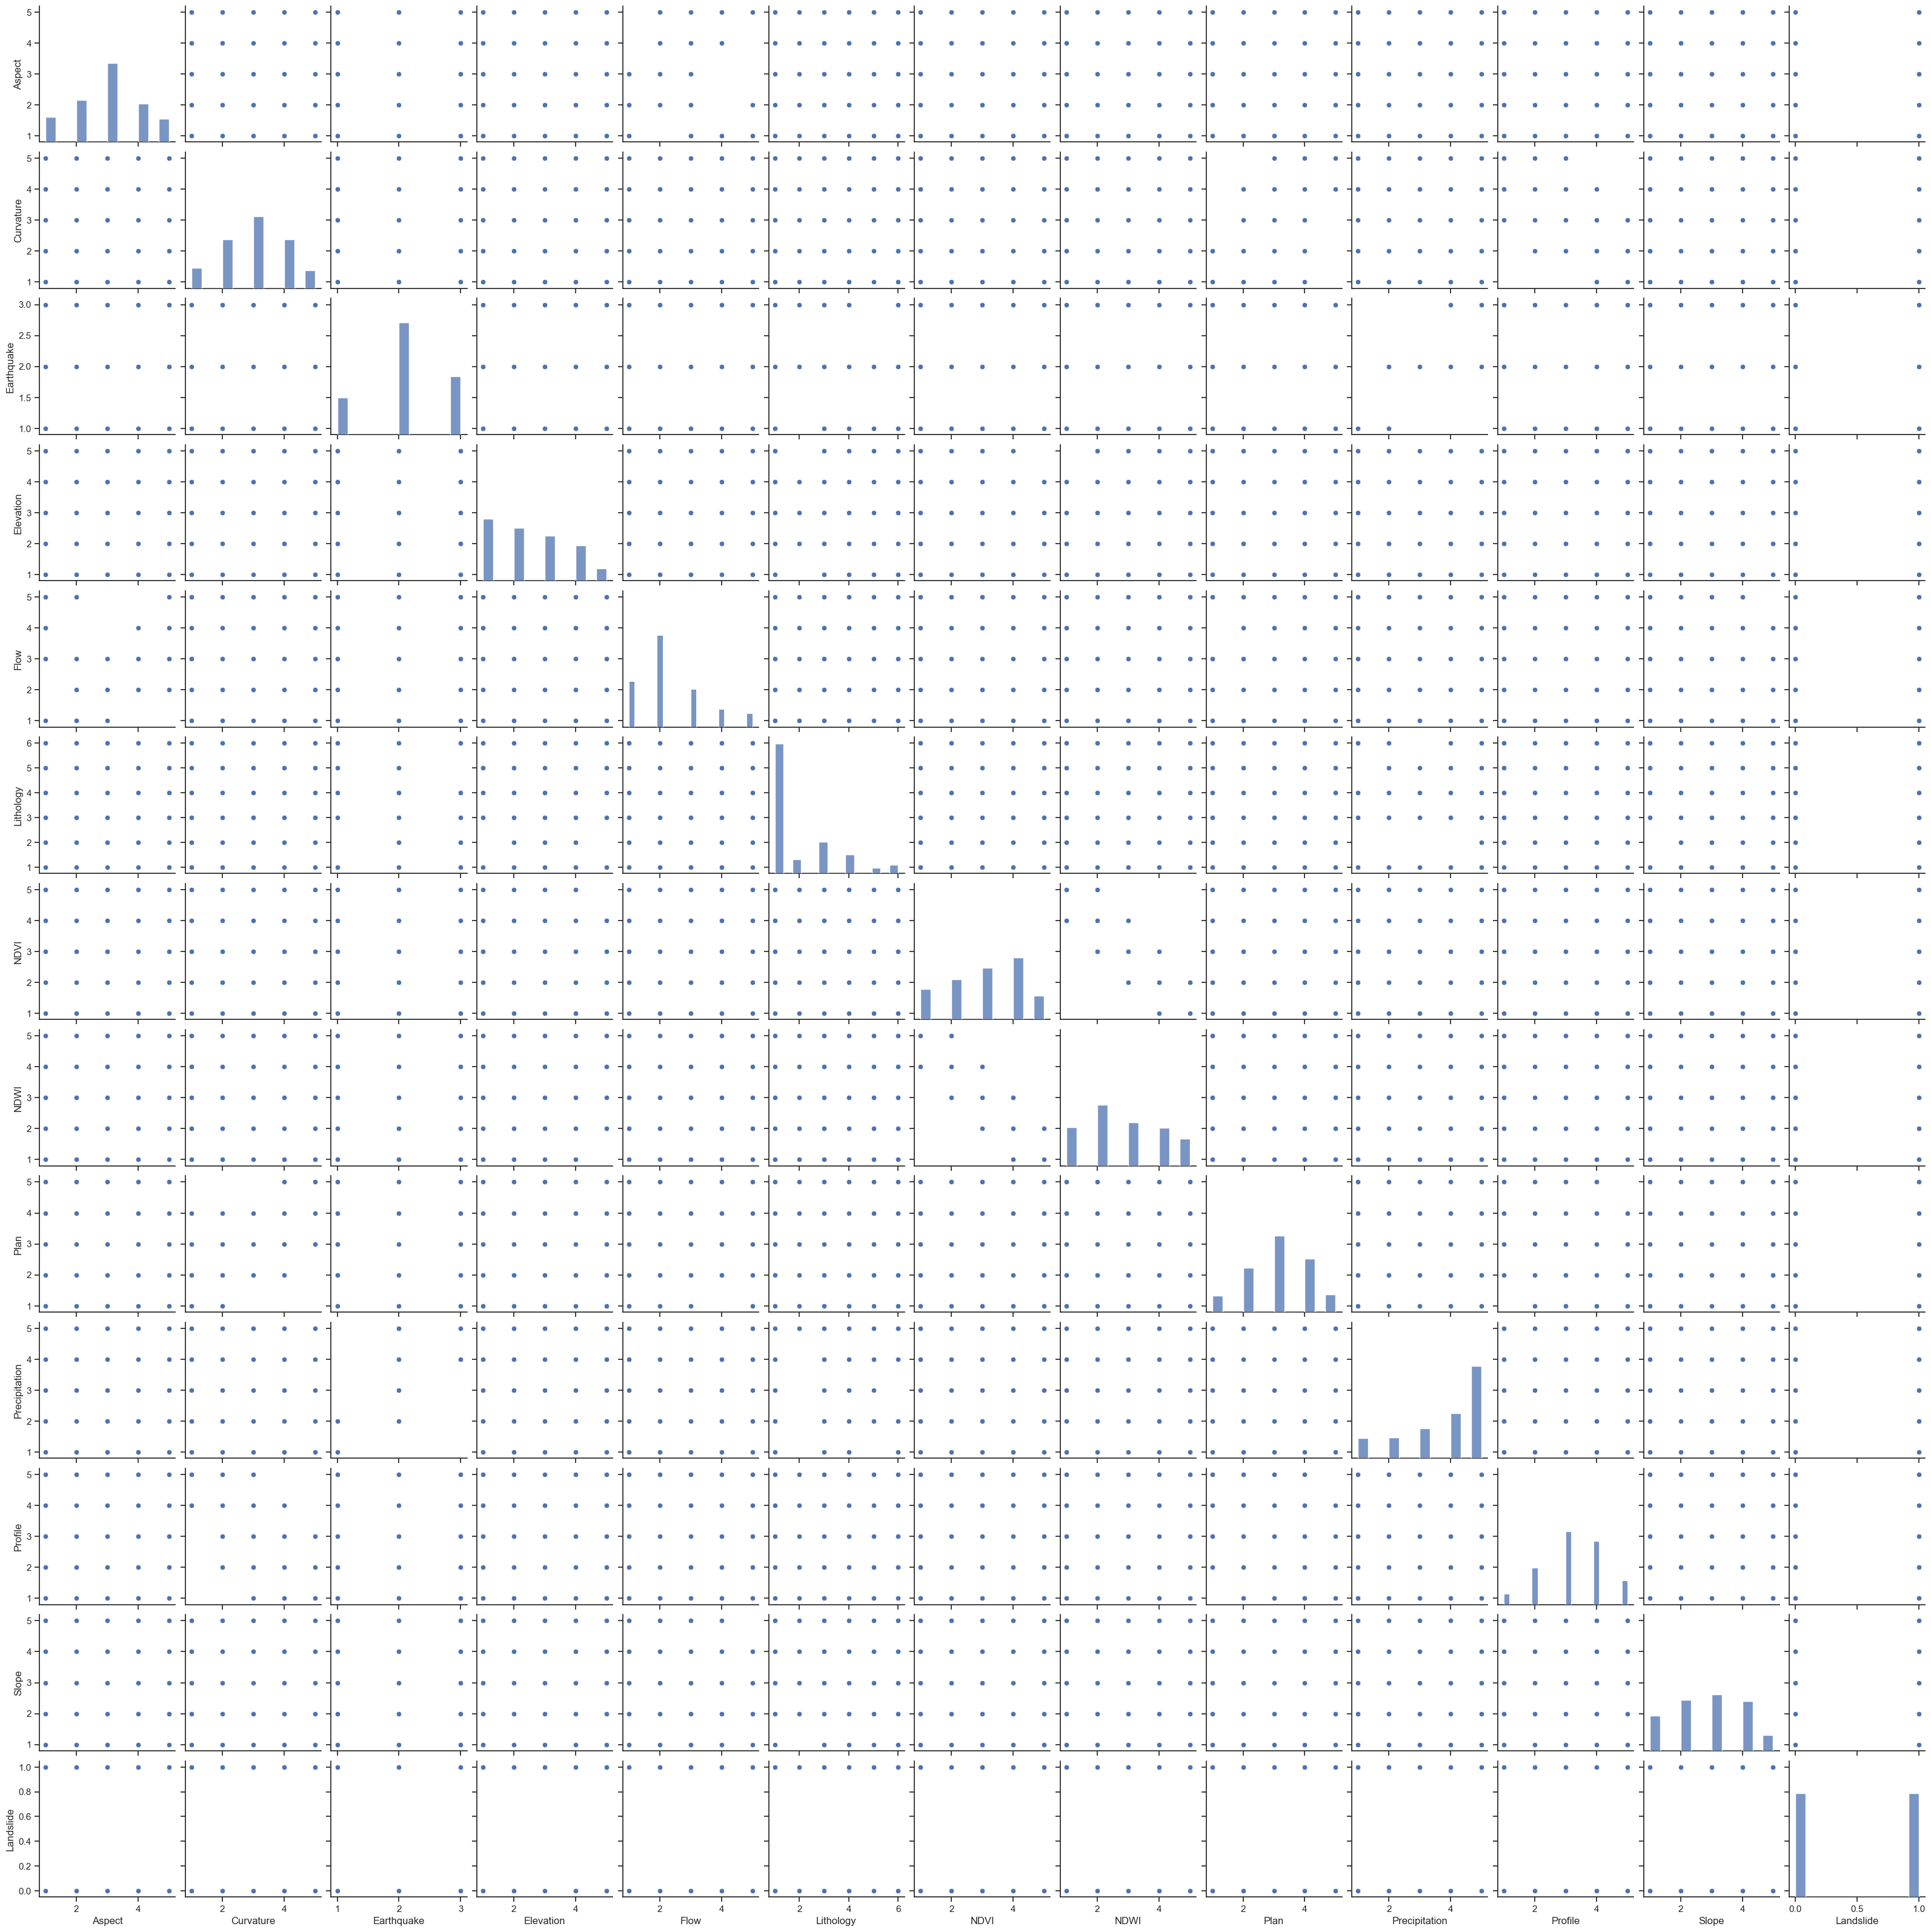

In [18]:
sns.set_theme(style="ticks")

sns.pairplot(df)

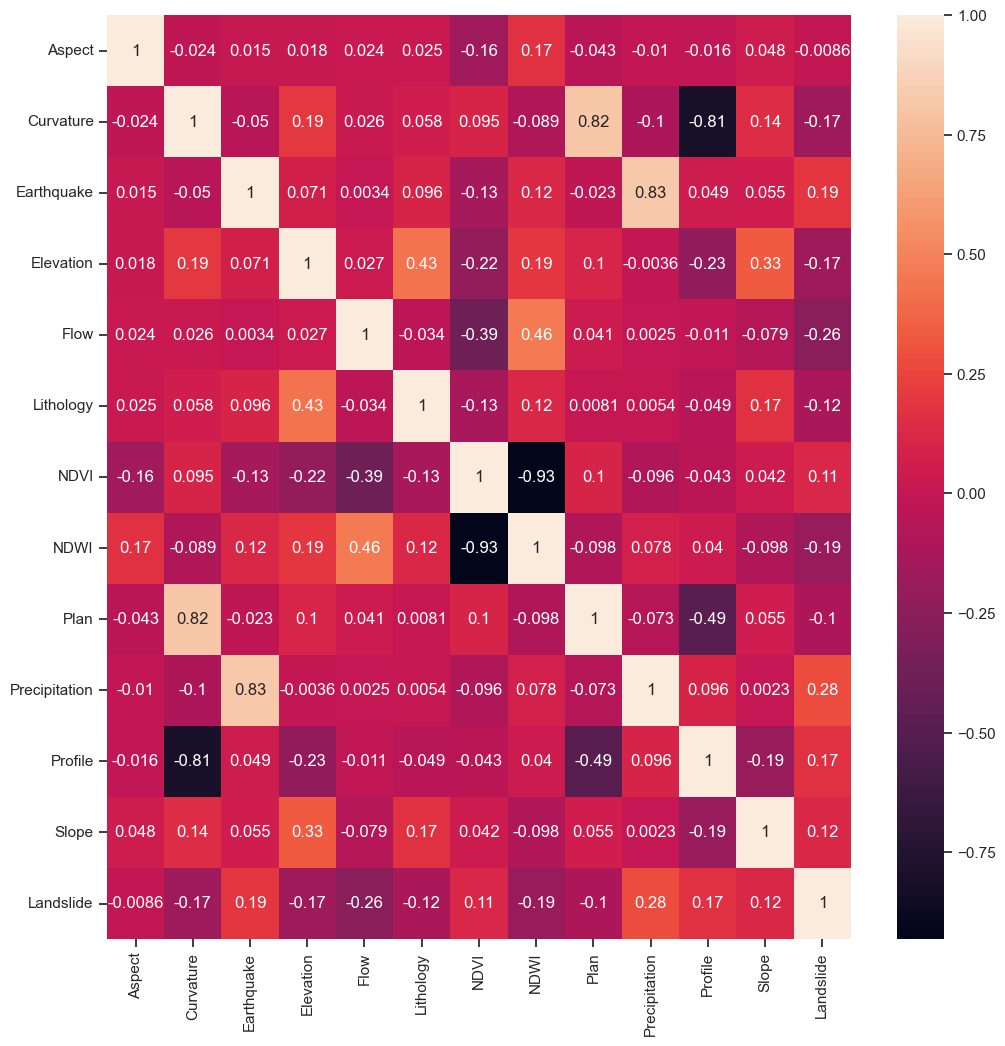

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

plt.show()

plt.savefig('corr1.eps', format='eps')

In [20]:
df.mean()

Aspect           2.962046
Curvature        2.977723
Earthquake       2.102310
Elevation        2.436469
Flow             2.338284
Lithology        1.948845
NDVI             3.042904
NDWI             2.773927
Plan             3.059406
Precipitation    3.813531
Profile          3.262376
Slope            2.811881
Landslide        0.500000
dtype: float64

In [21]:
df.groupby(['Landslide']).mean()

Aspect  Curvature  Earthquake  Elevation      Flow  Lithology  \
Landslide                                                                    
0          2.971947   3.168317    1.976898   2.645215  2.628713   2.120462   
1          2.952145   2.787129    2.227723   2.227723  2.047855   1.777228   

               NDVI      NDWI      Plan  Precipitation   Profile     Slope  
Landslide                                                                   
0          2.904290  3.026403  3.168317       3.435644  3.085809  2.665017  
1          3.181518  2.521452  2.950495       4.191419  3.438944  2.958746

In [22]:
df.corr()

Aspect  Curvature  Earthquake  Elevation      Flow  \
Aspect         1.000000  -0.024232    0.014727   0.017998  0.024295   
Curvature     -0.024232   1.000000   -0.049595   0.193843  0.025736   
Earthquake     0.014727  -0.049595    1.000000   0.071308  0.003382   
Elevation      0.017998   0.193843    0.071308   1.000000  0.026903   
Flow           0.024295   0.025736    0.003382   0.026903  1.000000   
Lithology      0.025086   0.058319    0.095507   0.429702 -0.033881   
NDVI          -0.158561   0.094625   -0.134619  -0.217003 -0.393805   
NDWI           0.168099  -0.089028    0.118588   0.187921  0.462291   
Plan          -0.043066   0.815075   -0.022582   0.104691  0.041163   
Precipitation -0.010454  -0.104207    0.825169  -0.003628  0.002451   
Profile       -0.015876  -0.806851    0.049177  -0.228721 -0.011119   
Slope          0.048420   0.143316    0.055050   0.333029 -0.078842   
Landslide     -0.008633  -0.173393    0.187313  -0.168049 -0.261124   

               Lithology      NDVI      NDWI      Plan  Precipitation  \
Aspect          0.025086 -0.158561  0.168099 -0.043066      -0.010454   
Curvature       0.058319  0.094625 -0.089028  0.815075      -0.104207   
Earthquake      0.095507 -0.134619  0.118588 -0.022582       0.825169   
Elevation       0.429702 -0.217003  0.187921  0.104691      -0.003628   
Flow           -0.033881 -0.393805  0.462291  0.041163       0.002451   
Lithology       1.000000 -0.129279  0.119080  0.008051       0.005351   
NDVI           -0.129279  1.000000 -0.931590  0.102043      -0.096063   
NDWI            0.119080 -0.931590  1.000000 -0.097774       0.078201   
Plan            0.008051  0.102043 -0.097774  1.000000      -0.072768   
Precipitation   0.005351 -0.096063  0.078201 -0.072768       1.000000   
Profile        -0.048930 -0.042720  0.040269 -0.487539       0.095657   
Slope           0.169103  0.041726 -0.098171  0.055292       0.002301   
Landslide      -0.120538  0.111900 -0.194317 -0.103052       0.280490   

                Profile     Slope  Landslide  
Aspect        -0.015876  0.048420  -0.008633  
Curvature     -0.806851  0.143316  -0.173393  
Earthquake     0.049177  0.055050   0.187313  
Elevation     -0.228721  0.333029  -0.168049  
Flow          -0.011119 -0.078842  -0.261124  
Lithology     -0.048930  0.169103  -0.120538  
NDVI          -0.042720  0.041726   0.111900  
NDWI           0.040269 -0.098171  -0.194317  
Plan          -0.487539  0.055292  -0.103052  
Precipitation  0.095657  0.002301   0.280490  
Profile        1.000000 -0.192357   0.169928  
Slope         -0.192357  1.000000   0.123029  
Landslide      0.169928  0.123029   1.000000

# Important Features using Mutual Information Classification¶

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [24]:
train_ratio = 0.8
val_ratio = 0.2
train_df, val_df = train_test_split(df, train_size = train_ratio, random_state=42)

In [25]:
features = list(df.columns.values.tolist())
df_feat = df.iloc[:, :-1]
features_wo = list(df_feat.columns.values.tolist())

In [26]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Aspect         1212 non-null   int64
 1   Curvature      1212 non-null   int64
 2   Earthquake     1212 non-null   int64
 3   Elevation      1212 non-null   int64
 4   Flow           1212 non-null   int64
 5   Lithology      1212 non-null   int64
 6   NDVI           1212 non-null   int64
 7   NDWI           1212 non-null   int64
 8   Plan           1212 non-null   int64
 9   Precipitation  1212 non-null   int64
 10  Profile        1212 non-null   int64
 11  Slope          1212 non-null   int64
dtypes: int64(12)
memory usage: 113.8 KB


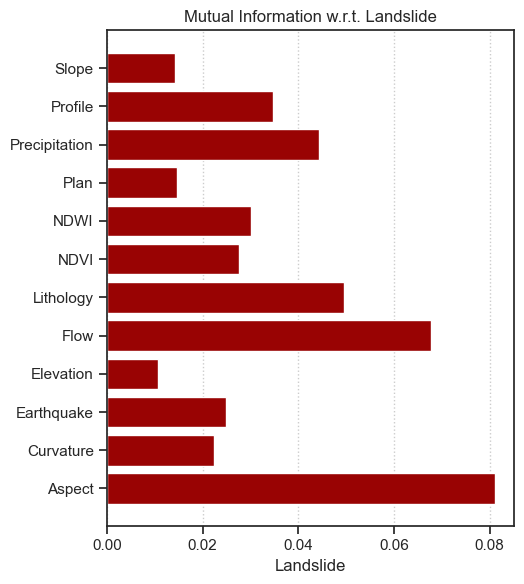

In [27]:
MI = (mutual_info_classif(df[features_wo], df["Landslide"], n_neighbors=20,
                          random_state=42))

plt.figure(figsize=(5.4, 6))
plt.barh(y=features_wo, width=MI, color="#990303")
plt.title("Mutual Information w.r.t. Landslide");
plt.xlabel("Landslide")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout()

plt.savefig('mi.eps', format='eps')

In [28]:
best3 = ['Precipitation', 'Earthquake', 'Aspect']
best5 = ['Lithology', 'Flow']
best5.extend(best3)
best8 = ['Profile', 'NDWI', 'NDVI']
best8.extend(best5)
all_feat = features_wo

feat  = [best3, best5, best8, all_feat]

In [29]:
for i in feat:
    print(df[i].head(2))

   Precipitation  Earthquake  Aspect
0              3           2       3
1              5           2       1
   Lithology  Flow  Precipitation  Earthquake  Aspect
0          1     2              3           2       3
1          1     1              5           2       1
   Profile  NDWI  NDVI  Lithology  Flow  Precipitation  Earthquake  Aspect
0        3     2     4          1     2              3           2       3
1        2     2     4          1     1              5           2       1
   Aspect  Curvature  Earthquake  Elevation  Flow  Lithology  NDVI  NDWI  \
0       3          3           2          2     2          1     4     2   
1       1          5           2          3     1          1     4     2   

   Plan  Precipitation  Profile  Slope  
0     2              3        3      2  
1     5              5        2      2  


# Feature Engineering!

In [30]:
df.head()

Aspect  Curvature  Earthquake  Elevation  Flow  Lithology  NDVI  NDWI  \
0       3          3           2          2     2          1     4     2   
1       1          5           2          3     1          1     4     2   
2       3          4           3          2     2          4     3     2   
3       1          3           3          3     5          1     2     4   
4       5          4           2          1     4          1     2     4   

   Plan  Precipitation  Profile  Slope  Landslide  
0     2              3        3      2          0  
1     5              5        2      2          0  
2     4              5        2      2          0  
3     3              5        3      3          0  
4     3              3        1      4          0

Frequency Encoding¶

In [31]:
def add_freq_column(df, col_name):
    col_freq = df[col_name].value_counts(normalize=True)
    df[f'{col_name}_freq'] = df[col_name].apply(lambda x : col_freq[x])

cols_to_freq = ['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope']

for col in cols_to_freq:
    add_freq_column(df, col)

In [32]:
import pandas as pd

In [33]:
df.columns

Index(['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology',
       'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope',
       'Landslide', 'Aspect_freq', 'Curvature_freq', 'Earthquake_freq',
       'Elevation_freq', 'Flow_freq', 'Lithology_freq', 'NDVI_freq',
       'NDWI_freq', 'Plan_freq', 'Precipitation_freq', 'Profile_freq',
       'Slope_freq'],
      dtype='object')

In [34]:
# Complete dataframe with frequency variables and target variable
df_comp = df.iloc[:, :13]

# Dataframe with frequency variables and target variable
df_freq = df.iloc[:, 12:]

# Dataframe with frequency variables
df_onlyfreq = df.iloc[:, 13:]

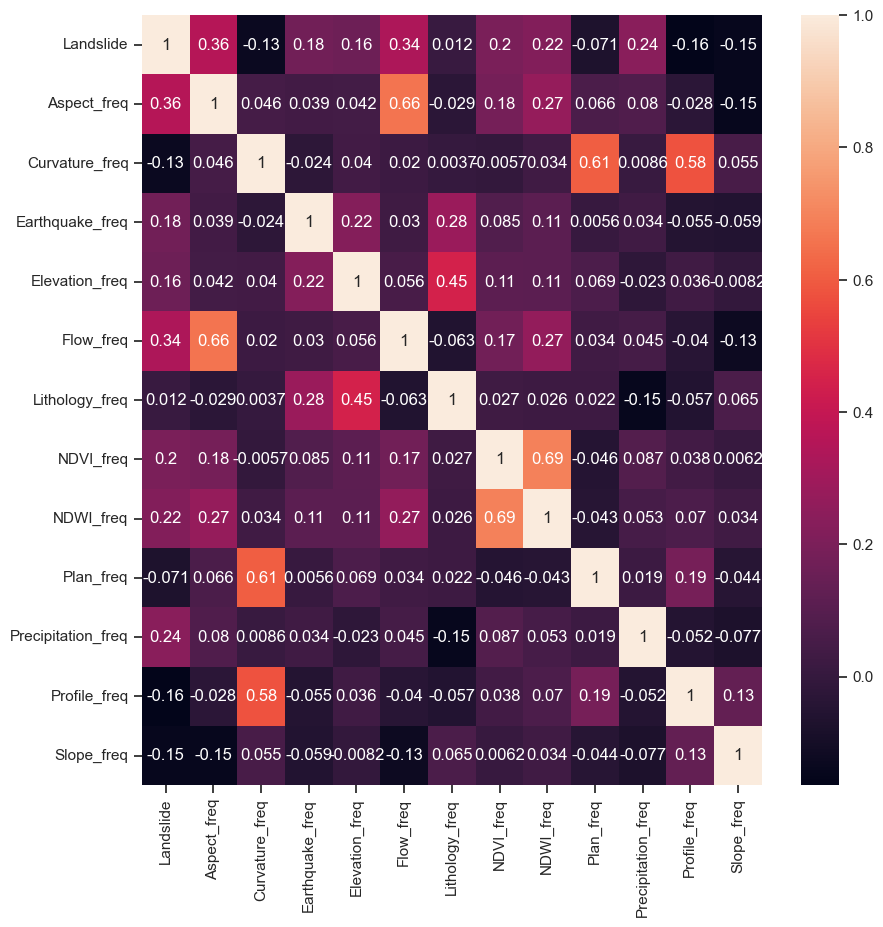

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df_freq.corr(), annot=True)

plt.show()

plt.savefig('corr2.eps', format='eps')

Feature **Selection**

In [36]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import ensemble
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [37]:
#!pip install pca

In [38]:
from pca import pca

X_pca = df.loc[:, df.columns != 'Landslide']

# scaler = StandardScaler()
# scaler.fit(X_pca)
# X_pca = scaler.transform(X_pca)

model = pca()
out = model.fit_transform(X_pca)
out = model.transform(X_pca)
print(out)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [24] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [24] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Extracting column labels from dataframe.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
  

[scatterd] >WARNING> The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


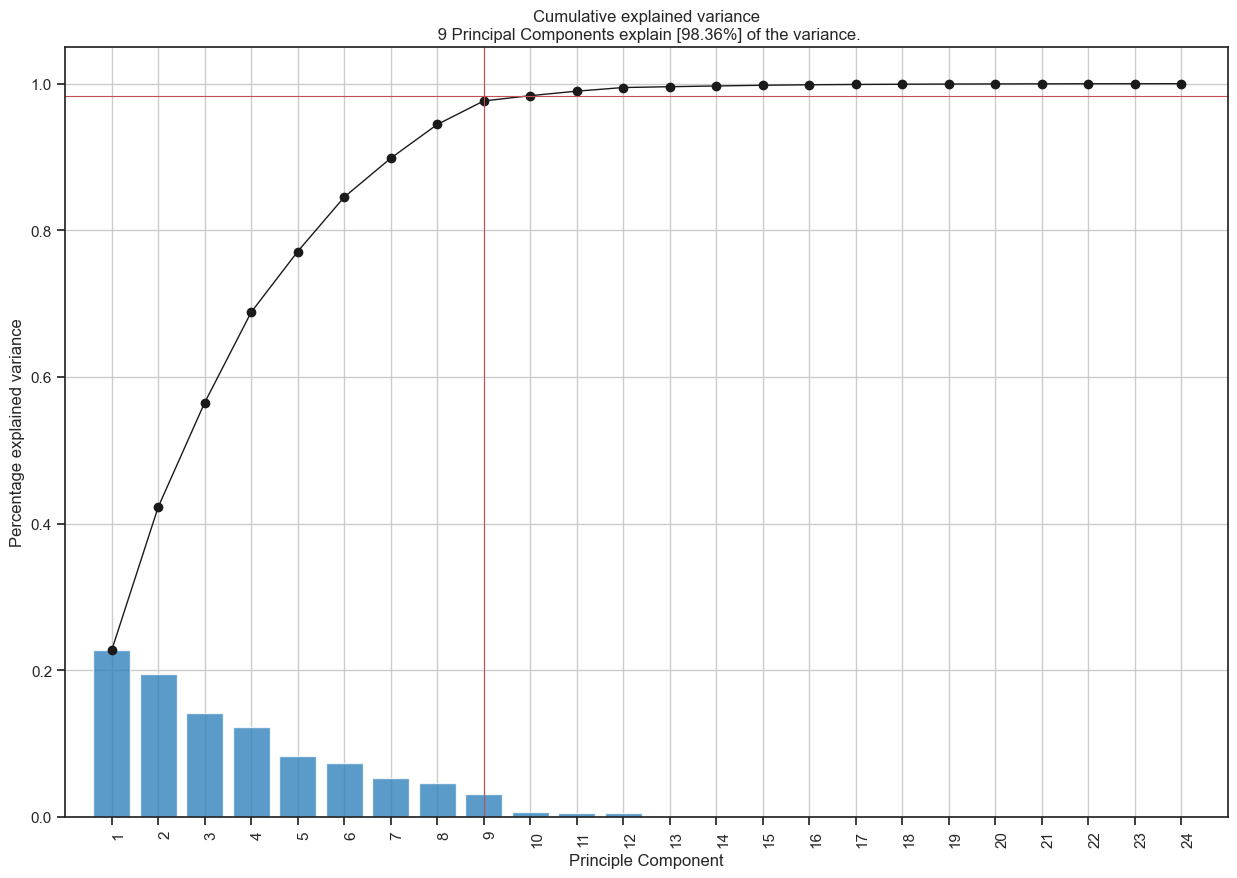

In [39]:
model.plot()

plt.savefig('pca1.eps', format='eps')

[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


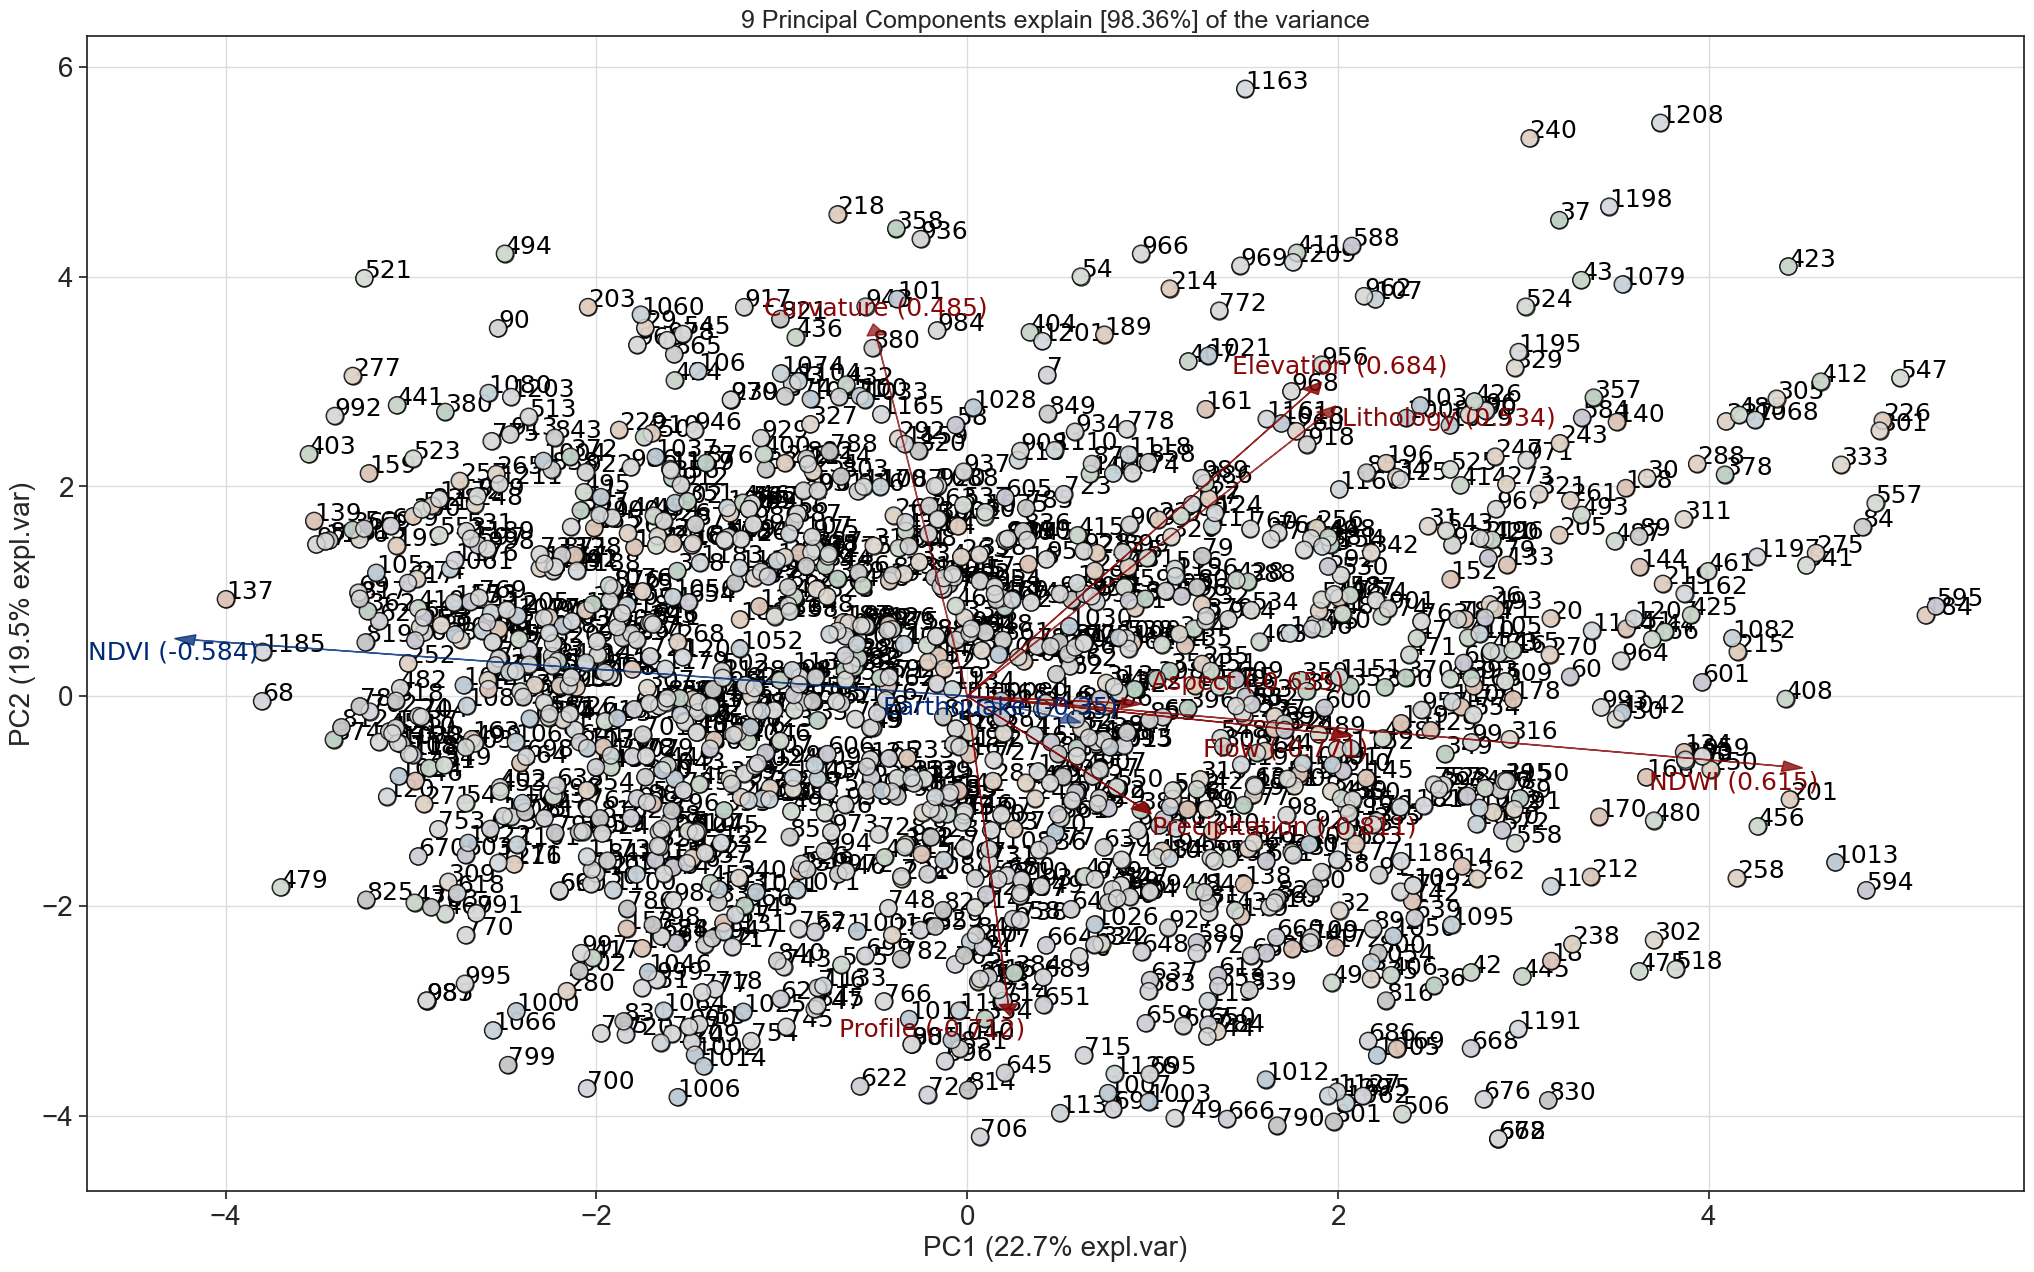

In [40]:
ax = model.biplot(n_feat=10, legend=False)

plt.savefig('pca2.eps', format='eps')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


[scatterd] >INFO> Create scatterplot


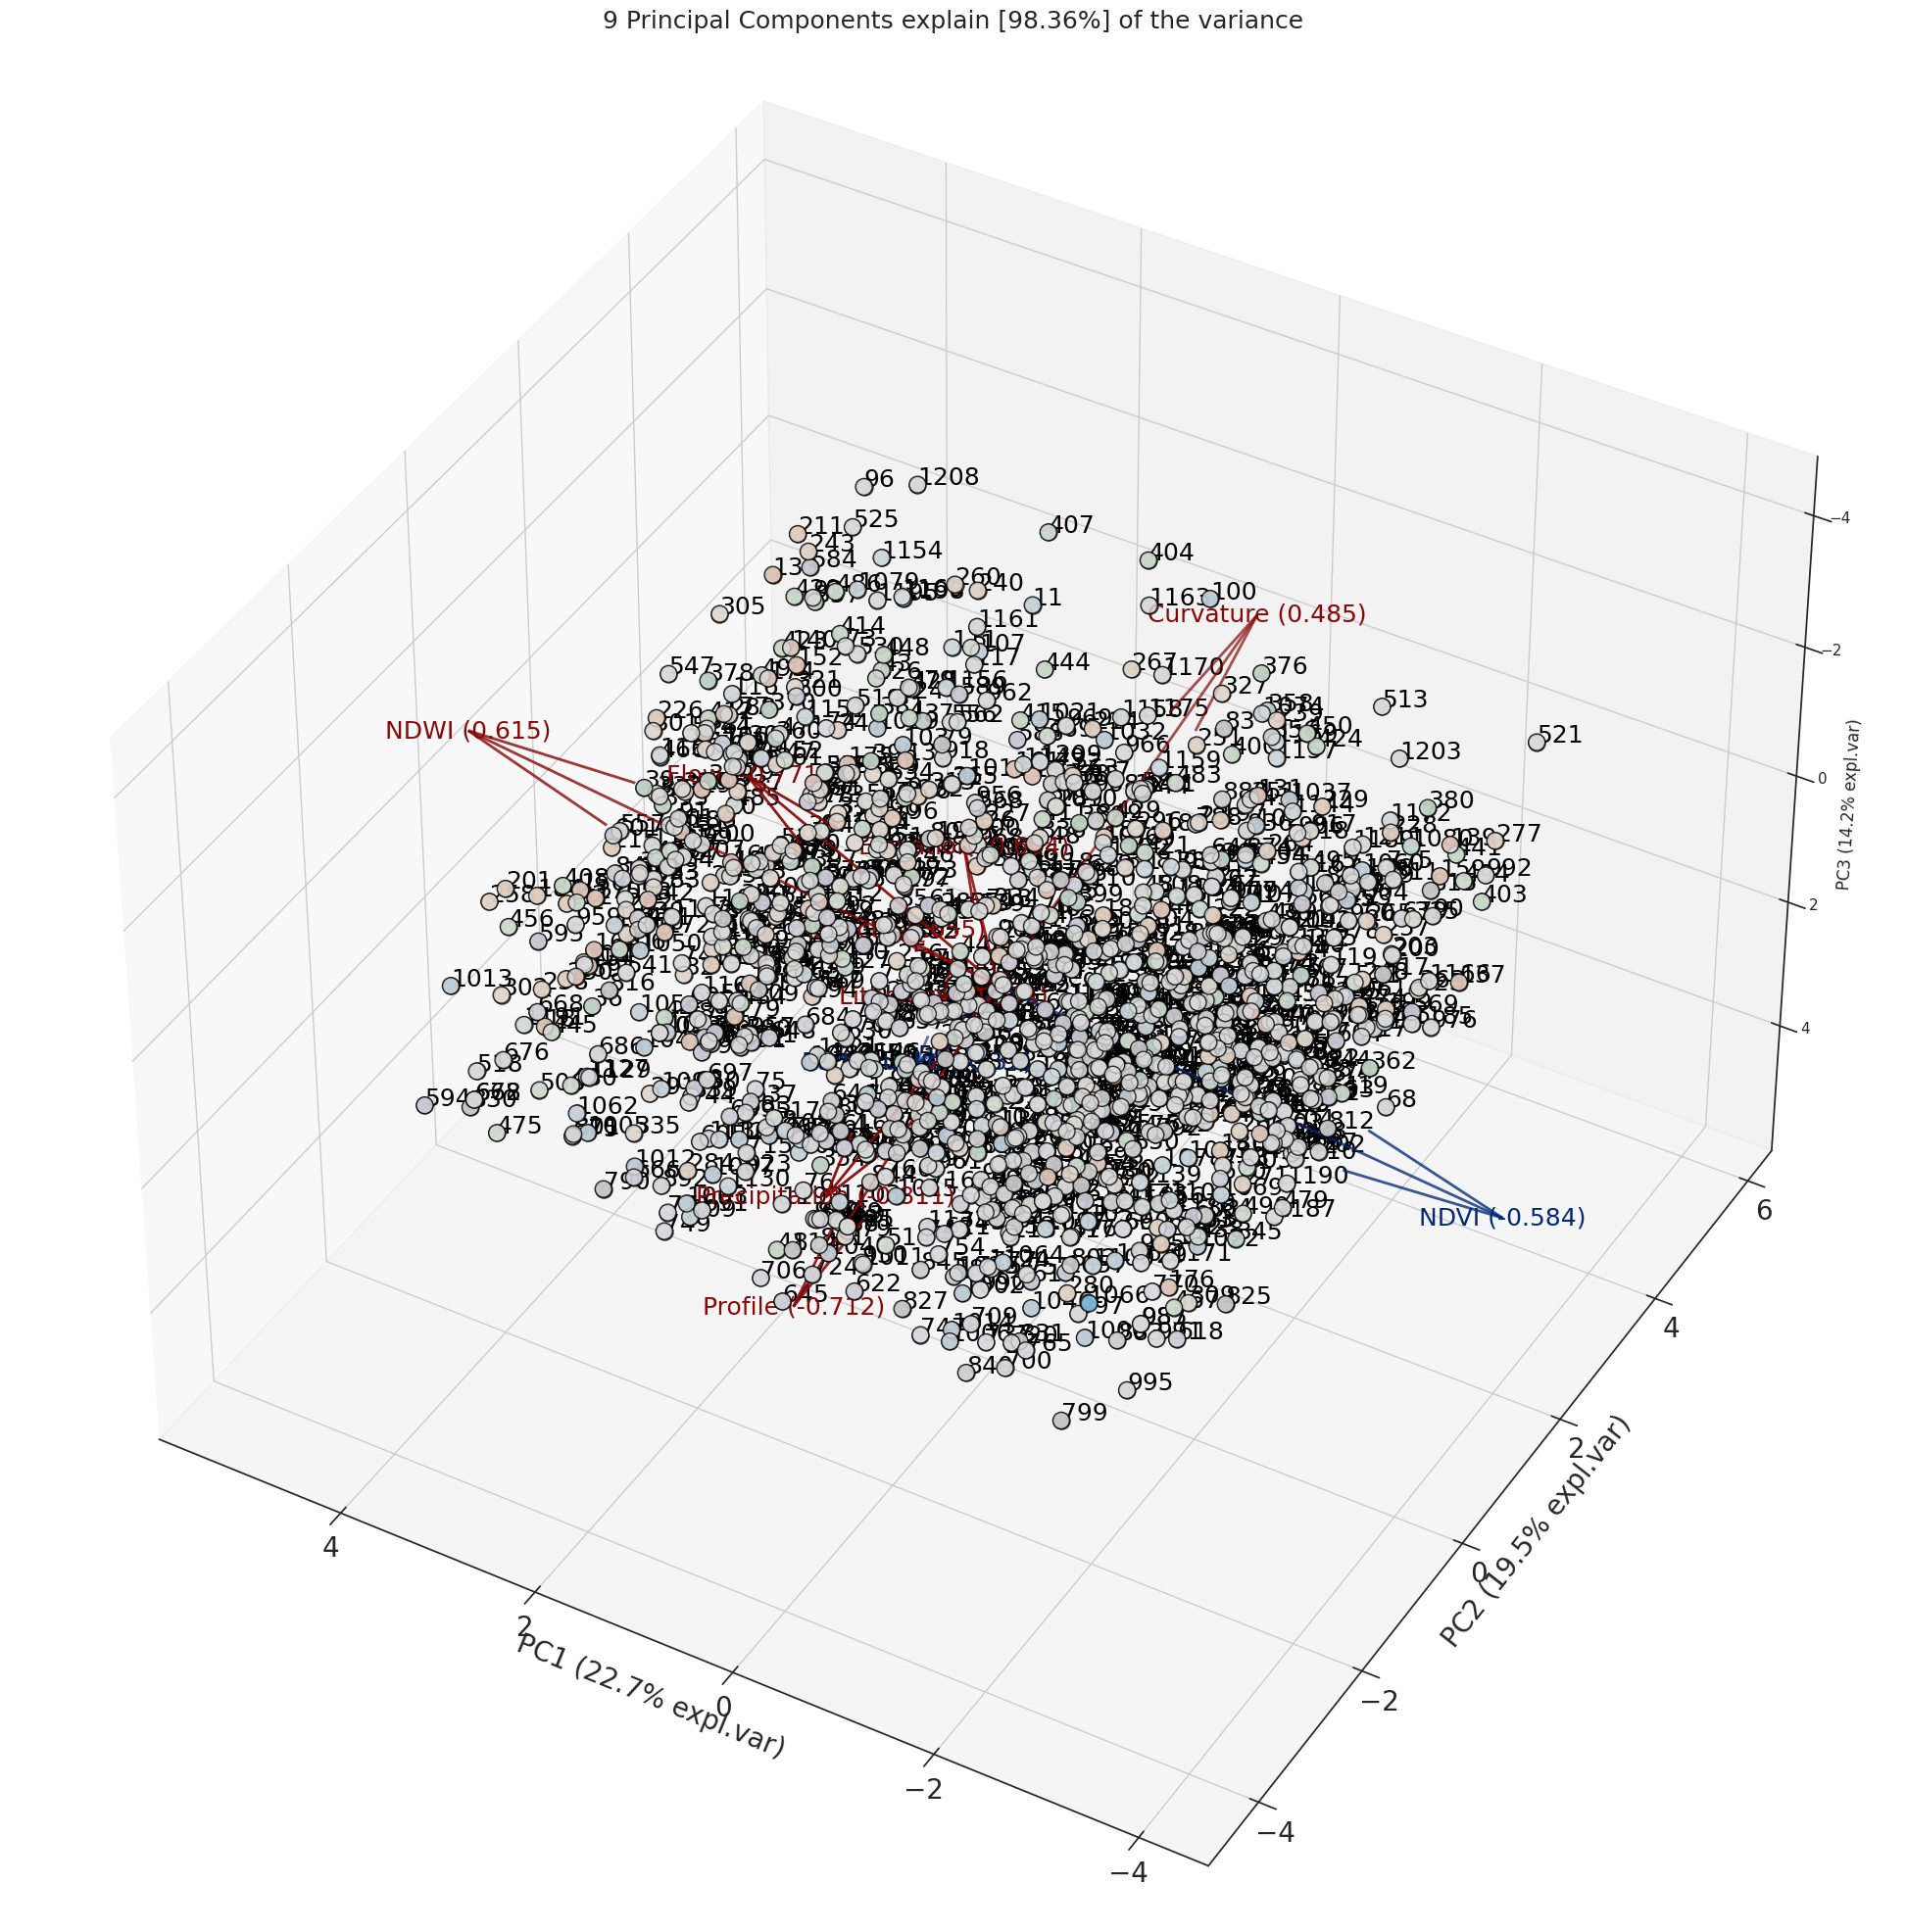

In [41]:
ax = model.biplot3d(n_feat=10, legend=False)

plt.savefig('pca3.eps', format='eps')

# Baseline ***Model***

In [42]:
y = df.Landslide
# y = df_freq.Landslide
# df= df.loc[:, df.columns != 'Landslide']
df1 = df.loc[:, df.columns != 'Landslide']
# df1 = df.loc[:, ['NDWI', 'Curvature', 'Lithology', 'Precipitation', 'Aspect', 'Flow',
#                 'Elevation', 'Profile', 'Earthquake']]
# df1 = df_freq.loc[:, ['Lithology_freq', 'Flow_freq', 'Precipitation_freq', 'Earthquake_freq', 'Curvature_freq',
#                 'Profile_freq', 'NDVI_freq', 'Aspect_freq']]
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2)


In [43]:
baseline_gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                                          min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline_gbm.fit(X_train,y_train)
predictors_gbm=list(X_train)
# feat_imp_gbm = pd.Series(baseline_gbm.feature_importances_, predictors_gbm).sort_values(ascending=False)
# feat_imp_gbm.plot(kind='bar', title='Importance of Features Using GBM')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline_gbm.score(X_test, y_test)))
pred_gbm=baseline_gbm.predict(X_test)
print(classification_report(y_test, pred_gbm))


Accuracy of the GBM on test set: 0.819
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       121
           1       0.82      0.82      0.82       122

    accuracy                           0.82       243
   macro avg       0.82      0.82      0.82       243
weighted avg       0.82      0.82      0.82       243



In [44]:
#pip install xgboost

In [45]:
from lightgbm import LGBMClassifier
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3,
                          #min_samples_split=2,
                          min_samples_leaf=1, subsample=1,
                          #max_features='sqrt',
                          random_state=10)
baseline_lgbm.fit(X_train,y_train)
predictors_lgbm=list(X_train)
# feat_imp_lgbm = pd.Series(baseline_lgbm.feature_importances_, predictors_lgbm).sort_values(ascending=False)
# feat_imp_lgbm.plot(kind='bar', title='Importance of Features Using LGBM')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the LGBM on test set: {:.3f}'.format(baseline_lgbm.score(X_test, y_test)))
pred_lgbm=baseline_lgbm.predict(X_test)
print(classification_report(y_test, pred_lgbm))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accur

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [47]:
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=10)

In [48]:
# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
pred_rf = random_forest.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = random_forest.score(X_test, y_test)
print('Accuracy of the Random Forest on test set: {:.3f}'.format(accuracy_rf))

# Generate and print the classification report
print(classification_report(y_test, pred_rf))

Accuracy of the Random Forest on test set: 0.749
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       121
           1       0.70      0.86      0.77       122

    accuracy                           0.75       243
   macro avg       0.76      0.75      0.75       243
weighted avg       0.76      0.75      0.75       243



In [49]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=1,
    colsample_bytree=1,
    objective='binary:logistic',  # For binary classification
    random_state=10
)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_xgb = xgb_classifier.score(X_test, y_test)
print('Accuracy of XGBoost on test set: {:.3f}'.format(accuracy_xgb))

# Generate and print the classification report
print(classification_report(y_test, pred_xgb))

Accuracy of XGBoost on test set: 0.815
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       121
           1       0.81      0.83      0.82       122

    accuracy                           0.81       243
   macro avg       0.82      0.81      0.81       243
weighted avg       0.81      0.81      0.81       243



In [79]:
y_pred = xgb_classifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0]


In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

# Define individual models
gbm_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1,
    max_features='sqrt',
    random_state=10
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=10
)

# Create an ensemble of models
ensemble_model = VotingClassifier(
    estimators=[
        ('gbm', gbm_model),
        ('rf', rf_model),
        # Add more models here if desired
    ],
    voting='soft'  # 'soft' for weighted voting based on probabilities
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
pred_ensemble = ensemble_model.predict(X_test)
print(pred_ensemble)
# Calculate and print the accuracy
accuracy_ensemble = ensemble_model.score(X_test, y_test)
print('Accuracy of the Ensemble Model on test set: {:.3f}'.format(accuracy_ensemble))

# Generate and print the classification report
print(classification_report(y_test, pred_ensemble))

[1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0]
Accuracy of the Ensemble Model on test set: 0.778
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       121
           1       0.76      0.81      0.79       122

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=10)

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred_svm = svm_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_svm = svm_classifier.score(X_test, y_test)
print('Accuracy of the SVM on test set: {:.3f}'.format(accuracy_svm))

# Generate and print the classification report
print(classification_report(y_test, pred_svm))

Accuracy of the SVM on test set: 0.807
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       121
           1       0.81      0.80      0.81       122

    accuracy                           0.81       243
   macro avg       0.81      0.81      0.81       243
weighted avg       0.81      0.81      0.81       243



In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Define the GBM model (you can use your existing model)
gbm_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1,
    max_features='sqrt',
    random_state=10
)

# Define the SVM model
svm_model = SVC(probability=True, random_state=10)  # Use probability=True to enable soft voting

# Create an ensemble of models
ensemble_model = VotingClassifier(
    estimators=[
        ('gbm', gbm_model),
        ('svm', svm_model)
        # Add more models here if desired
    ],
    voting='soft'  # 'soft' for weighted voting based on probabilities
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
pred_ensemble = ensemble_model.predict(X_test)

# Calculate and print the accuracy
accuracy_ensemble = ensemble_model.score(X_test, y_test)
print('Accuracy of the Ensemble Model on test set: {:.3f}'.format(accuracy_ensemble))

# Generate and print the classification report
print(classification_report(y_test, pred_ensemble))

Accuracy of the Ensemble Model on test set: 0.815
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       121
           1       0.82      0.81      0.81       122

    accuracy                           0.81       243
   macro avg       0.81      0.81      0.81       243
weighted avg       0.81      0.81      0.81       243



# **Tuning of Models**



n_estimators and Learning Rate¶

In [53]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1,
                                                            subsample=1,max_features='sqrt', random_state=10),
                                                            param_grid = p_test3, scoring='accuracy',n_jobs=4,
                                                             cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_gbm = tuning.best_params_.get("learning_rate")
n_estimators_gbm = tuning.best_params_.get("n_estimators")

In [54]:
p_test3a = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =LGBMClassifier(max_depth=4, min_samples_leaf=1,
                                                subsample=1, random_state=10),
                                                param_grid = p_test3a, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_lgbm = tuning.best_params_.get("learning_rate")
n_estimators_lgbm = tuning.best_params_.get("n_estimators")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Max depth

In [55]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm,n_estimators=n_estimators_gbm,
                                                            min_samples_split=2,
                                                            min_samples_leaf=1, subsample=1,max_features='sqrt',
                                                            random_state=10),
                                                            param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                                            cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_gbm = tuning.best_params_.get("max_depth")

In [56]:
p_test2a = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm,n_estimators=n_estimators_lgbm,
                                                min_samples_leaf=1, subsample=1, random_state=10),
                                                param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_lgbm = tuning.best_params_.get("max_depth")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

First Evaluation of New Model on Test Se

In [57]:
model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm,
                                    min_samples_split=2,
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.802
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       121
           1       0.79      0.82      0.81       122

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243



In [58]:
model1_lgbm = LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                             min_samples_leaf=1, subsample=1, random_state=10)
model1_lgbm.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(model1_lgbm.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the LGBM on test set: {:.3f}'.format(model1_lgbm.score(X_test, y_test)))
pred=model1_lgbm.predict(X_test)
print(classification_report(y_test, pred))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

## **Min Sample Split and Min Samples Leaf**

In [59]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            subsample=1,max_features='sqrt', random_state=10),
                                                            param_grid = p_test4, scoring='accuracy',n_jobs=4,
                                                            cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_gbm = tuning.best_params_.get("min_samples_leaf")

In [60]:
p_test4a = {'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm,
                                                subsample=1, random_state=10),
                                                param_grid = p_test4a, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_lgbm = tuning.best_params_.get("min_samples_leaf")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Max Features

In [61]:
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            subsample=1,
                                                            random_state=10), param_grid = p_test5, scoring='accuracy',
                                                            n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_features_gbm = tuning.best_params_.get("max_features")

Subsample

In [62]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm ,
                                                            random_state=10), param_grid = p_test6, scoring='accuracy',
                                                            n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_gbm = tuning.best_params_.get("subsample")

In [63]:
p_test6a= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm,
                                                min_samples_leaf=min_samples_leaf_lgbm,
                                                random_state=10), param_grid = p_test6, scoring='accuracy',
                                                n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_lgbm = tuning.best_params_.get("subsample")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

random_state

In [64]:
p_test7= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm ,
                                                            subsample=subsample_gbm), param_grid = p_test7,
                                                            scoring='accuracy',
                                                            n_jobs=4, cv=6)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_gbm = tuning.best_params_.get("random_state")

In [65]:
p_test7a= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm, min_samples_leaf=min_samples_leaf_lgbm,
                                                subsample=subsample_lgbm), param_grid = p_test7a, scoring='accuracy',
                                                n_jobs=4, cv=8)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_lgbm = tuning.best_params_.get("random_state")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Optimal Parameters

In [66]:
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
a8 = []

In [67]:
a1.append('GBM')
a2.append(learning_rate_gbm)
a3.append(n_estimators_gbm)
a4.append(max_depth_gbm)
a5.append(min_samples_leaf_gbm)
a6.append(max_features_gbm)
a7.append(subsample_gbm)
a8.append(random_state_gbm)

opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})

In [68]:
a1.append('LGBM')
a2.append(learning_rate_lgbm)
a3.append(n_estimators_lgbm)
a4.append(max_depth_lgbm)
a5.append(min_samples_leaf_lgbm)
a6.append('--')
a7.append(subsample_lgbm)
a8.append(random_state_lgbm)

opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})

In [69]:
opt_par

Name  learning_rate  n_estimators  max_depth  min_samples_leaf  \
0   GBM          0.050           100          4                 5   
1  LGBM          0.005           750          4                 9   

  max_features  subsample_gbm  random_state  
0            2            1.0            62  
1           --            0.7             0

# Evaluation of Final Model on Test Set

In [70]:
new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)
predictors=list(X_train)
# feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred)) 

Accuracy of the GBM on test set: 0.802
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       121
           1       0.78      0.84      0.81       122

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243



In [71]:
new_lgbm=LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                        min_samples_leaf=min_samples_leaf_lgbm, subsample=subsample_lgbm, random_state=random_state_lgbm)
new_lgbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the LGBM on test set: {:.3f}'.format(new_lgbm.score(X_test, y_test)))
pred=new_lgbm.predict(X_test)
print(classification_report(y_test, pred))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

AttributeError: 'pca' object has no attribute 'predict'

#Comparison of ROC AUC

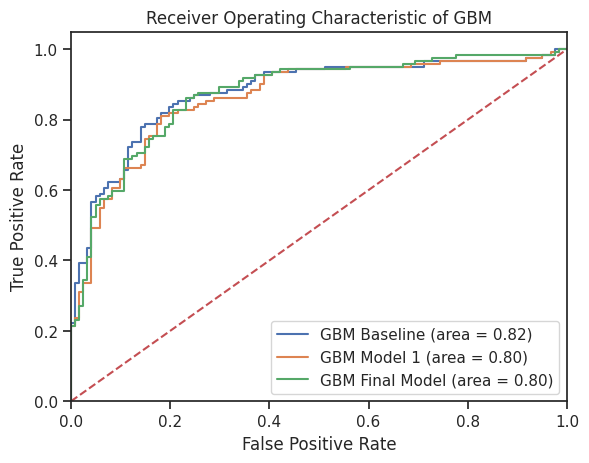

<Figure size 640x480 with 0 Axes>

In [72]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#run models
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                                      min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm,
                                    min_samples_split=2,
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of GBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig('roc1.eps', format='eps')


In [73]:
print('Accuracy of the GBM on test set for Baseline Model: {:.3f}'.format(baseline.score(X_test, y_test)))
print('Accuracy of the GBM on test set for Model1: {:.3f}'.format(model1.score(X_test, y_test)))
print('Accuracy of the GBM on test set for New Model: {:.3f}'.format(new.score(X_test, y_test)))

Accuracy of the GBM on test set for Baseline Model: 0.819
Accuracy of the GBM on test set for Model1: 0.802
Accuracy of the GBM on test set for New Model: 0.802


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 484, number of negative: 485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499484 -> initscore=-0.002064
[LightGBM] [Info] Start training from score -0.002064
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

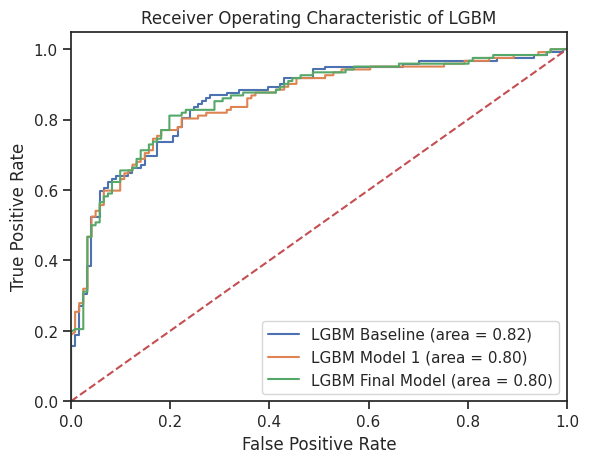

<Figure size 640x480 with 0 Axes>

In [74]:
#run models
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3,
                               min_samples_leaf=1, subsample=1, random_state=10)
baseline_lgbm.fit(X_train,y_train)

model1_lgbm = LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                             min_samples_leaf=1, subsample=1, random_state=10)
model1_lgbm.fit(X_train,y_train)

new_lgbm=LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                        min_samples_leaf=min_samples_leaf_lgbm, subsample=subsample_lgbm, random_state=random_state_lgbm)
new_lgbm.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
baseline_lgbm_roc_auc = roc_auc_score(y_test, baseline_lgbm.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline_lgbm.predict_proba(X_test)[:,1])
#model 1
model1_lgbm_roc_auc = roc_auc_score(y_test, model1_lgbm.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1_lgbm.predict_proba(X_test)[:,1])
#new tuned model
new_lgbm_roc_auc = roc_auc_score(y_test, new_lgbm.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new_lgbm.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='LGBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='LGBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='LGBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of LGBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig('roc2.eps', format='eps')

In [75]:
print('Accuracy of the LGBM on test set for Baseline Model: {:.3f}'.format(baseline_lgbm.score(X_test, y_test)))
print('Accuracy of the LGBM on test set for Model1: {:.3f}'.format(model1_lgbm.score(X_test, y_test)))
print('Accuracy of the LGBM on test set for New Model: {:.3f}'.format(new_lgbm.score(X_test, y_test)))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set for Baseline Model: 0.790
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set for Model1: 0.786
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
Accuracy of the LGBM on test set for New Model: 0.802
